In [1]:
# Packages
import h5py
import numpy as np
from amuse.units import units
import matplotlib.pyplot as plt

In [153]:
def plot_moon(moon, path, tidal=False, kozai=False, savefig=False):
    
    if kozai:
        name = '.hdf5'
        total_name = path+moon+name
        res = h5py.File(total_name)
    if tidal:
        total_name = path+'tidal_'+moon+'.hdf5'
        res = h5py.File(total_name)
    
    ecc = res['ecc'][:]
    inc = res['inc'][:]
    sma = res['sma'][:]
    time_range = res['time'][:]

    plt.rcParams.update({'font.size': 25})
    colours = ['r', 'g', 'b', 'm']
    
    if tidal:
        fig, (ax2, ax3) = plt.subplots(2, 1, figsize=[20, 10], tight_layout=True)
        
        ax2.set_title('Europa', pad=10)
        ax2.plot(time_range, ecc, color=colours[1], lw=2)   
        ax2.set_ylabel('eccentricity', labelpad=10)
        
        porb = np.array(sma) * (1-np.array(ecc))
        ax3.plot(time_range, porb, color=colours[3], lw=2)
        ax3.set_ylabel('periapsis', labelpad=10)
        ax3.set_xlabel('time [yr]')
        
        ax2.set_xlim([0,200000])
        ax3.set_xlim([0,200000])
        ax2.tick_params(direction='in', length=6, width=2, top=True, right=True)
        ax3.tick_params(direction='in', length=6, width=2, top=True, right=True)
    
    if kozai:
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[25, 15], tight_layout=True)
        
        ax1.plot(time_range, inc, color=colours[0], label=moon)   
        ax1.set_ylabel('Inc [deg]')
        ax1.legend()

        ax2.plot(time_range, ecc, color=colours[1], label=moon)   
        ax2.set_ylabel('Ecc')
        ax2.legend()
    
        porb = np.array(sma) * (1-np.array(ecc))
        ax3.plot(time_range, porb, color=colours[3], label=moon)
        ax3.set_ylabel('Periapsis')
        ax3.set_xlabel('t [yr]')
        
    if savefig:
        plt.savefig('tidal_eu.png', dpi=300, facecolor='w')

    res.close()
    plt.show()

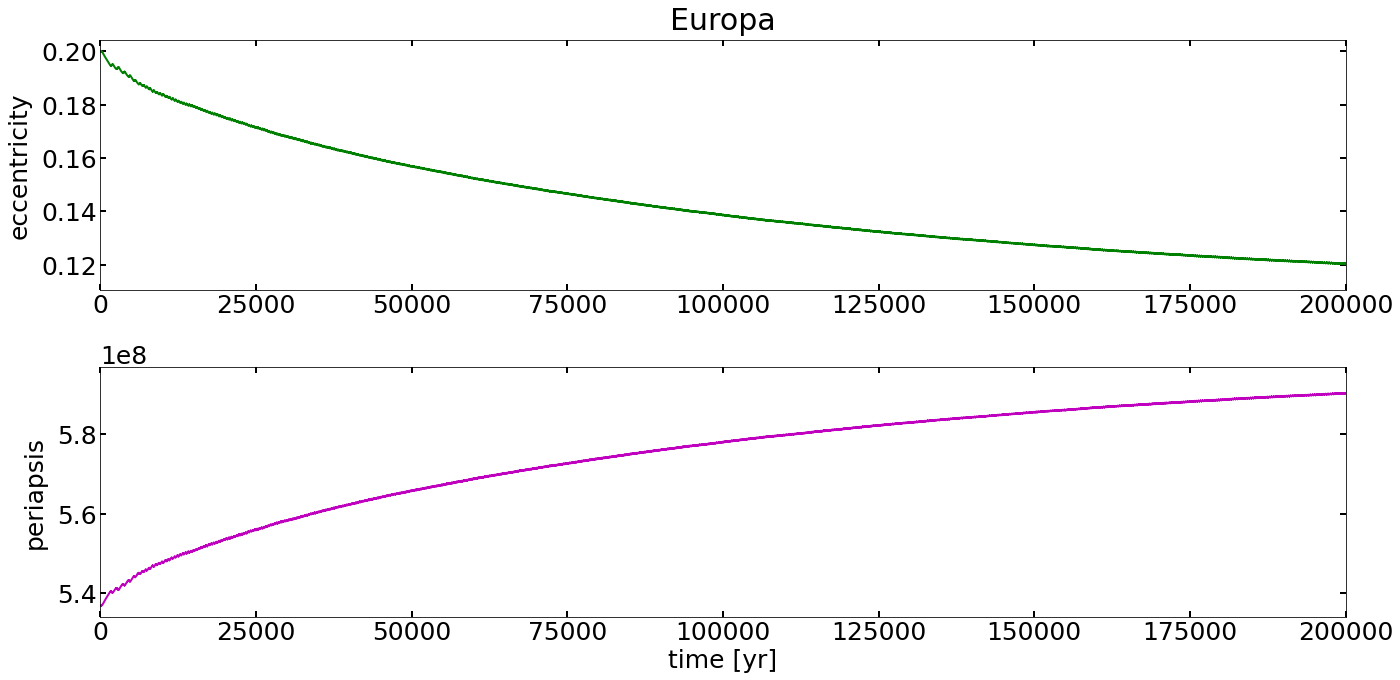

In [154]:
path = 'alice_data/' 
plot_moon('eu', path=path, tidal=True, kozai=False, savefig=False)

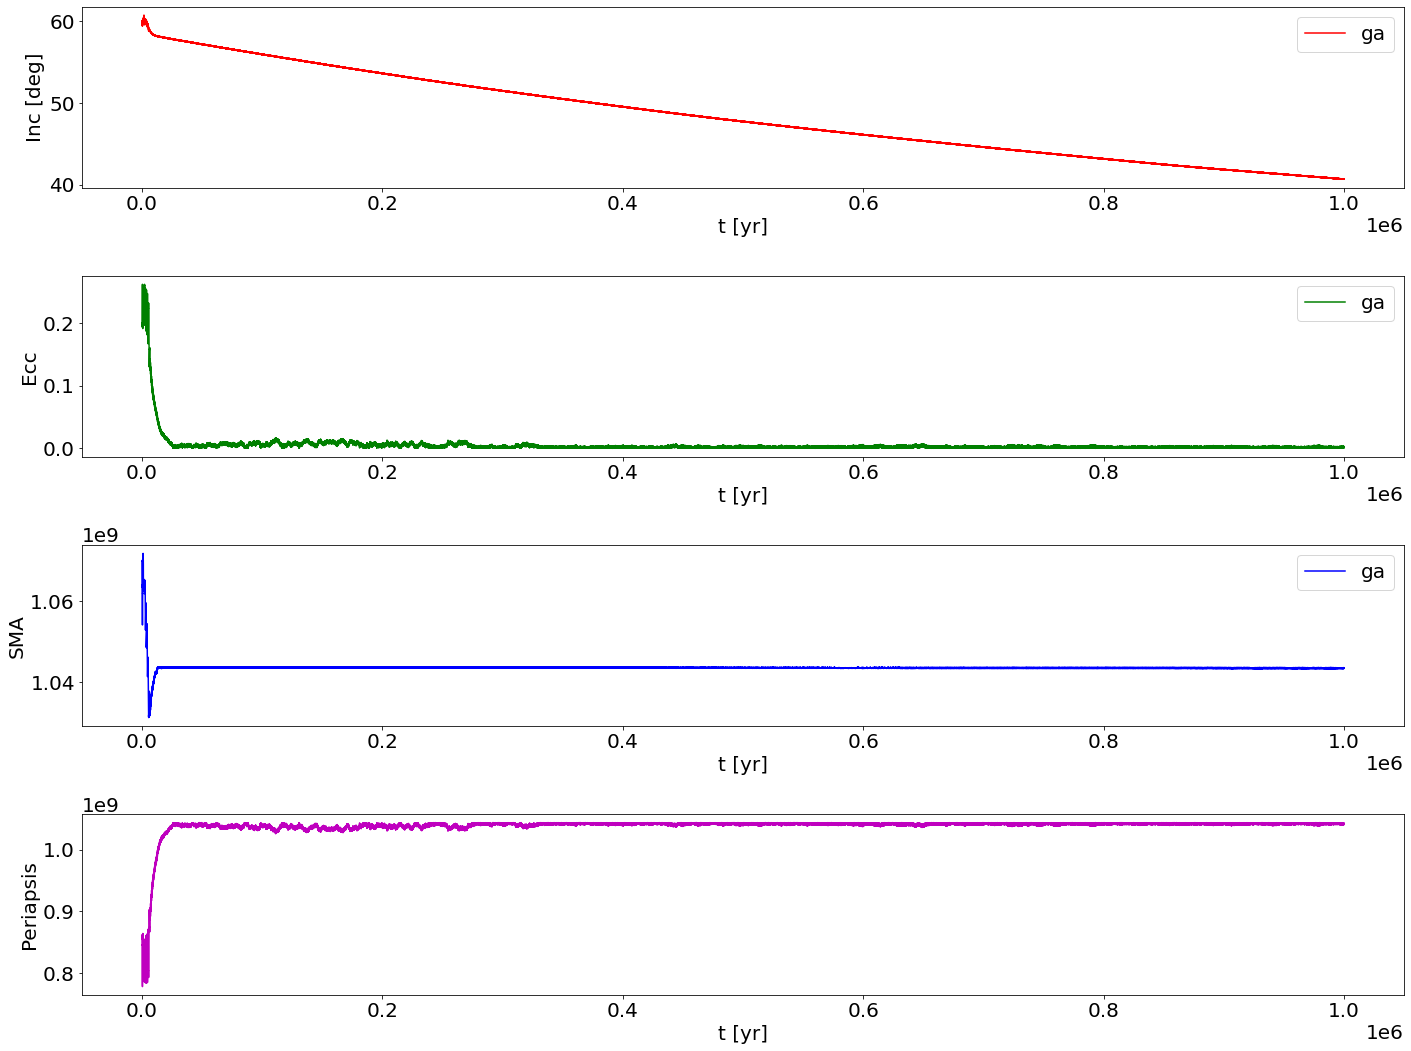

In [5]:
path = '/home/astrobrez/Amuse-env/amuse-project/new_data/'
name = 'ga.hdf5'
res = h5py.File(path+name)

moon = 'ga'
inc = res['inc'][:]
ecc = res['ecc'][:]
sma = res['sma'][:]
time_range = res['time'][:]

plt.rcParams.update({'font.size': 20})
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=[20, 15], tight_layout=True, facecolor='w')
colours = ['r', 'g', 'b', 'm']

ax1.plot(time_range, inc, color=colours[0], label=moon)   
ax1.set_ylabel('Inc [deg]')
ax1.set_xlabel('t [yr]')
ax1.legend()

ax2.plot(time_range, ecc, color=colours[1], label=moon)   
ax2.set_ylabel('Ecc')
ax2.set_xlabel('t [yr]')
ax2.legend()

ax3.plot(time_range, sma, color=colours[2], label=moon)   
ax3.set_ylabel('SMA')
ax3.set_xlabel('t [yr]')
ax3.legend()

porb = np.array(sma) * (1-np.array(ecc))
ax4.plot(time_range, porb, color=colours[3], label=moon)
ax4.set_ylabel('Periapsis')
ax4.set_xlabel('t [yr]')

res.close()
plt.show()

In [37]:
path = '/home/astrobrez/Amuse-env/amuse-project/final_data/'
res = h5py.File(path+'porb_1000.hdf5')

In [43]:
res.close()

In [84]:
def plot_params(name, savefig=False):
    
    path = '/home/astrobrez/Amuse-env/amuse-project/final_data/'
    res = h5py.File(path+name)

    plt.rcParams.update({'font.size': 25})
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(25, 12), tight_layout=True, facecolor='w')
    
    moons = list(res.keys())
    moons.reverse()
    props = list(res[moons[0]].keys())
    time = res[moons[0]][props[3]][:]
    
    #lines = ['-', '--', '-.', ':']
    labels = ['Io', 'Europa', 'Ganymede', 'Callisto']
    cb1 = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf']
    cb2 = ['#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
    cb3 = ['#e41a1c', '#ff7f00', '#999999', '#377eb8']
    
    
    for i in range(4):

        ecc = res[moons[i]][props[0]][:]
        inc = res[moons[i]][props[1]][:]

        ax1.plot(time, ecc, label=labels[i], c=cb3[i], lw=2)
        ax2.plot(time, inc, label=labels[i], c=cb3[i], lw=2)
        
        ax1.set_ylabel('eccentricity', labelpad=10)
        ax2.set_ylabel('inclination [deg]', labelpad=10)
        
        ax1.set_xlim([0,3000])
        ax1.set_ylim([0,1])
        ax2.set_xlim([0,3000])
        
        ax1.set_title('Full moon system (dt = 0.2 days)', pad=10)
        ax2.set_xlabel('time [yr]')
        ax1.tick_params(direction='in', length=6, width=2, top=True, right=True)
        ax2.tick_params(direction='in', length=6, width=2, top=True, right=True)
        
        ax1.legend(loc=2)
        ax2.legend(loc=3)
        
    if savefig:
        plt.savefig('dt_porb.png', dpi=300, facecolor='w')
    plt.show()

    res.close()

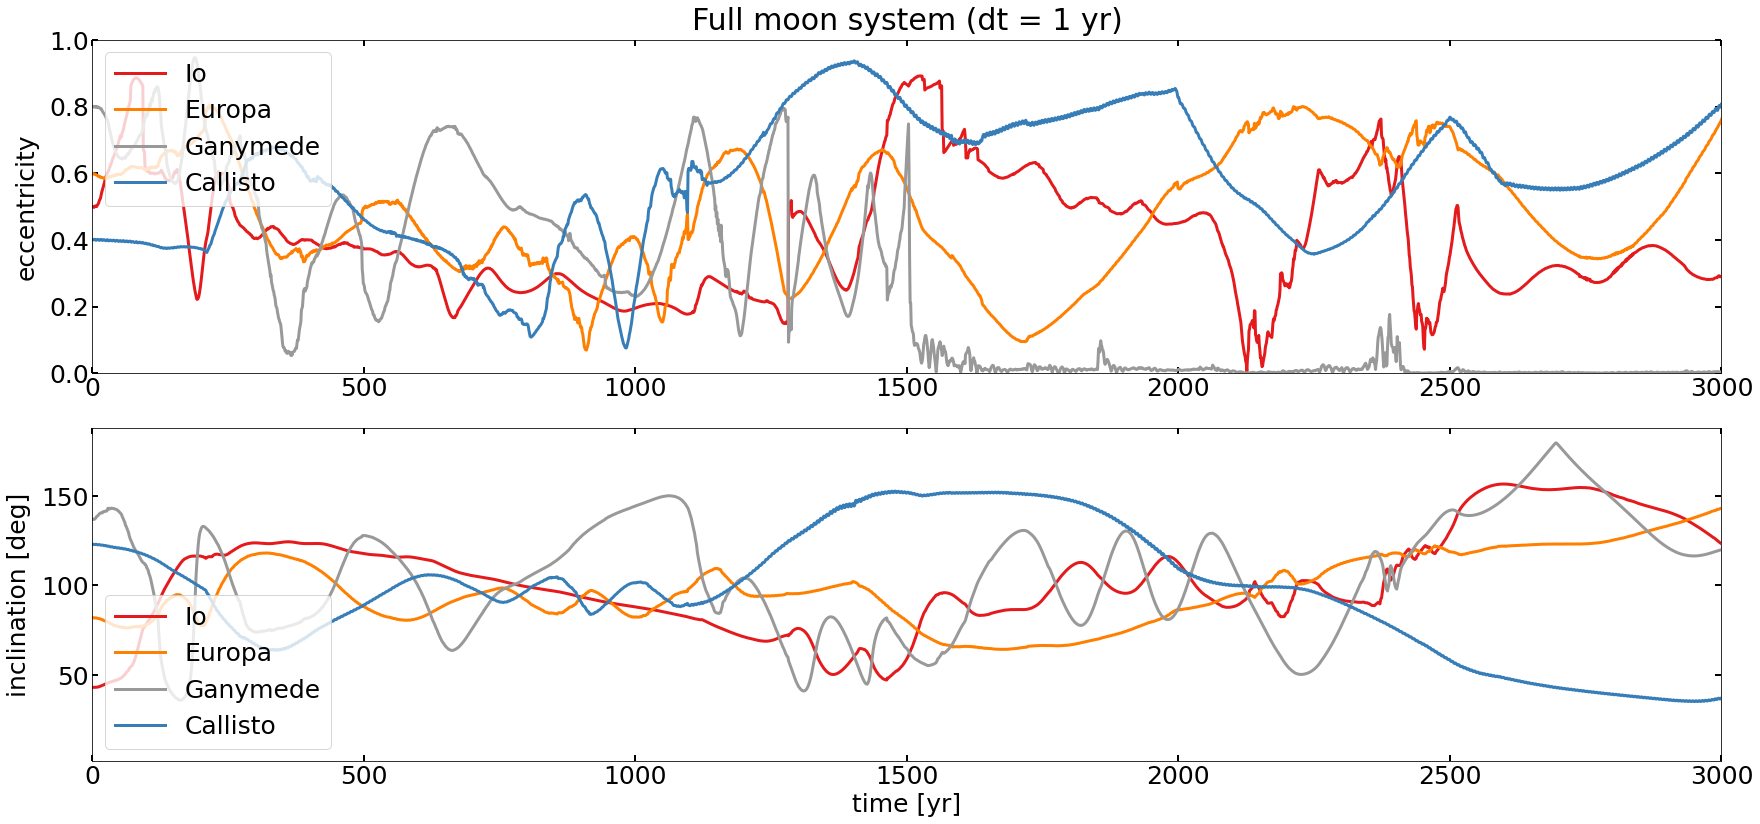

In [85]:
plot_params('final.hdf5', savefig=True)

In [176]:
def plot_params(e=True):
    
    path = 'param_space/'
    res = h5py.File(path+'p_space.hdf5')
    time_range = res['0']['init']['t'][:]

    fig, axis = plt.subplots(5, 2, figsize=(20, 15), tight_layout=True)
    allaxes = np.array(fig.get_axes())
    axes = allaxes.ravel()
    
    colors = ['r', 'b', 'g', 'm']
    moons = ['io', 'eu', 'ga', 'ca']
        
    for i, ax in enumerate(axes):
        
        x = list(res.keys())
        
        for j in range(4):
            if e:
                name = 'Ecc'
                ecc = res[x[i]][moons[j]]['ecc'][:]
                ax.plot(time_range, ecc, c=colors[j])
            else:
                name = 'Inc'
                inc = res[x[i]][moons[j]]['inc'][:]
                ax.plot(time_range, inc, c=colors[j])
            
            ax.set_title(x[i], fontsize=14)
            
            #ax.set_xlabel('t [yr]', fontsize=14)
            #ax.set_ylabel('e', fontsize=14, rotation=1, labelpad=8)

    plt.suptitle(name, fontsize=20)
    plt.show()
    #plt.savefig('{}.png'.format(x[j]), facecolor='w', bbox_inches='tight')

    res.close()

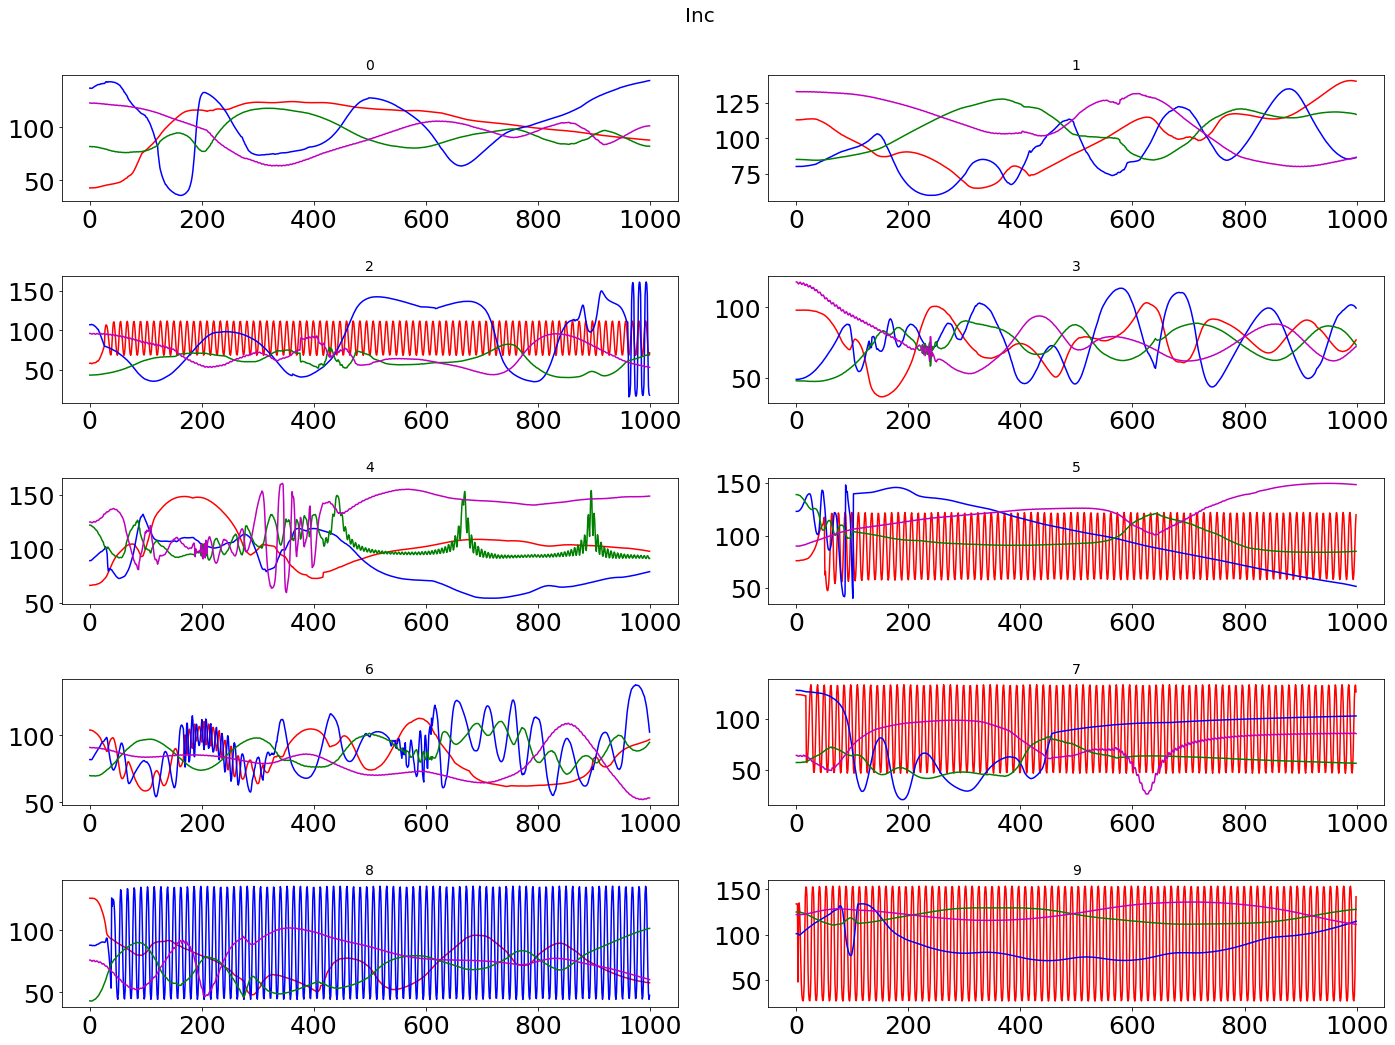

In [177]:
plot_params(e=False)

In [75]:
def plot_moon(moon, path, tidal=False, kozai=False, savefig=False):
    
    if kozai:
        name = '.hdf5'
        total_name = path+moon+name
        res = h5py.File(total_name)
    if tidal:
        total_name = path+'tidal_'+moon+'.hdf5'
        res = h5py.File(total_name)
    
    ecc = res['ecc'][:]
    inc = res['inc'][:]
    sma = res['sma'][:]
    time_range = res['time'][:]

    plt.rcParams.update({'font.size': 25})
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=[25, 15], tight_layout=True)
    colours = ['r', 'g', 'm']
    
    ax1.set_title('Single moon: Ganymede', pad=10)
    
    ax1.plot(time_range, inc, color=colours[0], lw=3)   
    ax1.set_ylabel('inclination [deg]', labelpad=10)
    ax1.set_xlim([0, 20000])
    ax1.set_ylim([58, 61])
    ax1.tick_params(direction='in', length=6, width=2, top=True, right=True)

    ax2.plot(time_range, ecc, color=colours[1], lw=3)   
    ax2.set_ylabel('eccentricity', labelpad=10)
    ax2.set_xlim([0, 20000])
    ax2.set_ylim([0,0.3])
    ax2.tick_params(direction='in', length=6, width=2, top=True, right=True)
    
    porb = np.array(sma) * (1-np.array(ecc))
    ax3.plot(time_range, porb, color=colours[2], lw=3)
    ax3.set_ylabel('periapsis')
    ax3.set_xlim([0, 20000])
    ax3.set_xlabel('time [yr]', labelpad=10)
    ax3.tick_params(direction='in', length=6, width=2, top=True, right=True)
    
    if savefig:
        plt.savefig('ganymede_all_effects.png', dpi=300, facecolor='w', bbox_inches='tight')

    res.close()
    plt.show()

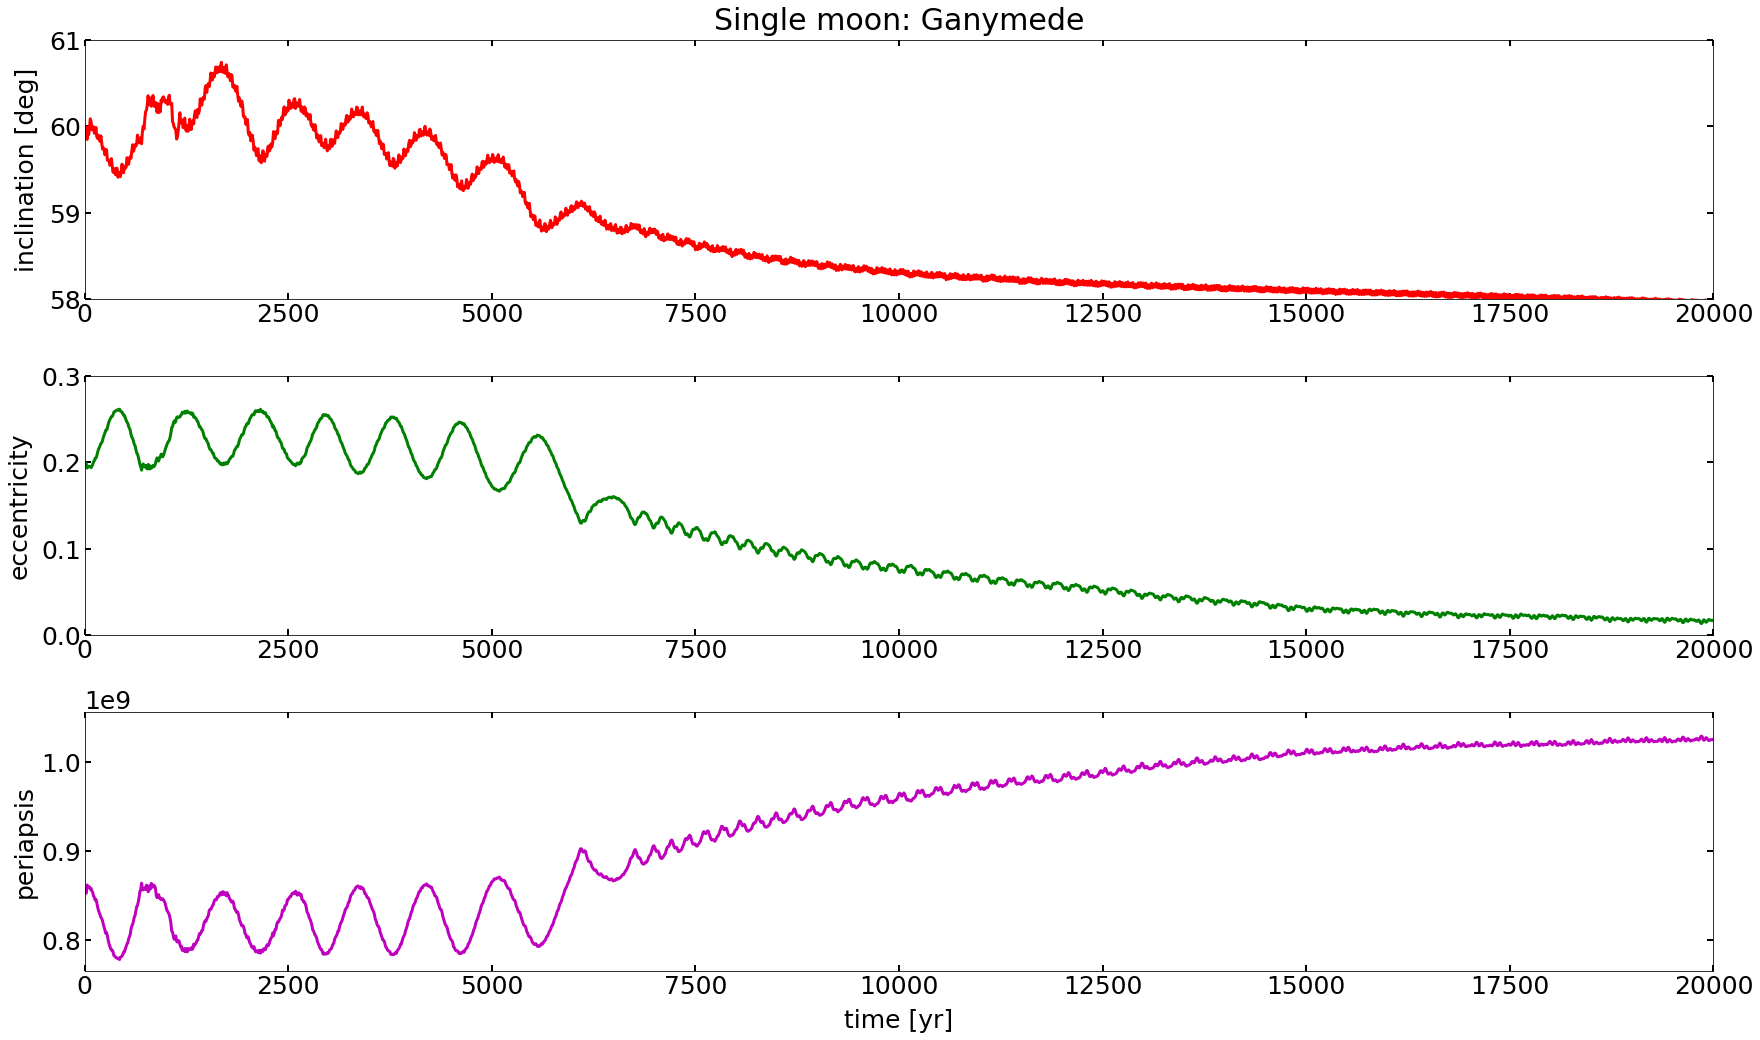

In [76]:
path = 'alice_data/'
plot_moon('ga', path=path, tidal=False, kozai=True, savefig=True)